# Answers
Some exercises to practice for the exam. The difficulty of the exercises are representative for the exam.

You don't have to make all assignments, however, you should feel comfortable with Python and get well acquainted with measurement & uncertainty.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf 

# Mean and standard deviaton
You probably know the `np.mean` and the `np.std` commands. However you can also do them yourself using the definitions:
\begin{equation}\label{eq:mean}
\overline{x} = \frac{1}{N} \sum_{i=1}^N x_i
\end{equation}
    
\begin{equation}\label{eq:std}
\sigma_x =  \sqrt{\frac{1}{N-1}   \sum_{i=1}^N (x_i - \mu_x)^2  }
\end{equation}

Use these on the following dataset and see if you get the same results as the `np.mean` and the `np.std` commands.

### Exercise 1

The dataset is a measurement from 1 single flat by 11 different persons.

|Measurement Number|Total Height (m)|
|---|---|
|1|141.02|
|2|148.15|
|3|157.27|
|4|115.81|
|5|149.22|
|6|207.52|
|7|180.20|
|8|161.92|
|9|164.28|
|10|206.80|
|11|42.50|


**Questions**

**a** Calculate in two different ways the mean value, the standard deviation.


**b** How would you as a phyisicst write the size of the flat down?

*If you notice a difference between the `np.std` function and the manual function I would encourage you to look at the documentation of the `np.std` function [Here](https://numpy.org/doc/stable/reference/generated/numpy.std.html).*

In [33]:
#Data from the table
L = np.array([141.02,148.15,157.27,115.81,149.22,207.52,180.2,161.92,164.28,206.8,42.5])

#Calculate mean and std 'manually'
Flat_av = np.sum(L)/len(L)
Flat_std = np.sqrt(np.sum((L-Flat_av)**2)/(len(L)-1))

print('Tree height is {:.0f} +/- {:.0f} m'.format(round(Flat_av,-1),round(Flat_std/np.sqrt(len(L)),-1)))

#Compare values with numpy functions, if true, nothing happens
assert Flat_av == np.mean(L), 'The results for the mean are different'
assert Flat_std == np.std(L,ddof=1), 'The results for the standard deviation are different'


Tree height is 150 +/- 10 m


### Exercise 2

A shop owner wants to know how many people visit his shop. He installs a device that counts the number of people that enter the shop every minute. In total 1000 measurements were done.

**Questions**

**a** Import the data_1.dat file. 
 
**b** Determine the average value as well as the standard deviation
 
**c** Plot the data in a histogram. What kind of distribution do you think the data is best described by, and why?

Average value: 3.885 
Standard deviation: 1.925 


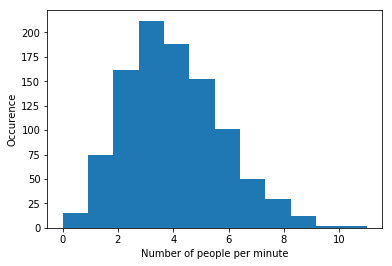

It looks like a Poisson distribution. It concerns a counting experiment, so that makes sense.


In [5]:
#Import data
Data = np.genfromtxt("data_1.dat")

#Calculate mean and std
Pers_mean = np.mean(Data)
Pers_std = np.std(Data,ddof=1)

print('Average value: %.3f \n\
Standard deviation: %.3f ' %(Pers_mean,Pers_std))

#Make the plot
f,g,_ = plt.hist(Data,bins= 12)
plt.xlabel('Number of people per minute')
plt.ylabel('Occurence')
plt.show()

print('It looks like a Poisson distribution. It concerns a counting experiment, so that makes sense.')

# The Error Function and Chauvenaut's theorem
For using Chauvenaut's theorem you need to use the error function. The error function is defined as follows:
\begin{equation}\label{eq:}
erf(x) = \frac{2}{\sqrt{\pi}} \int_0 ^x e^{-t^2} dt
\end{equation}

This is a so called non elementary function. It can be approached numerically, luckily you don't have to do this yourself because `scipy` already has a function for this. The Erf is a function (more formally called the cdf function) which is more often used in statistics and is used in the Chauvenaut's theorem. 

\begin{equation}\label{eq:cdf}
Erf(x,\overline{x},\sigma_x) = \frac{1}{2} [1+erf(\frac{x-\overline{x}}{\sqrt{2}\sigma_x})]
\end{equation}

### Exercise 3
**a** Use `from scipy.special import erf` and make a plot of the error function in the range [-3,3] to see how the function behaves. 

**b** Use this to plot the Erf function, with the $\sigma$ and $\overline{x}$ found in exercise 1(for this you have to change the domain of your plot). This function is the same as the one that can be found on this [site](https://www.danielsoper.com/statcalc/calculator.aspx?id=53).

**c** Use the dataset from exercise 1 to see if the last value (with length 42.5 m) can be discarded. And if so, what kind of influence does this have on the mean and the std.

**d** What are the pros and cons of removing the point from the dataset.

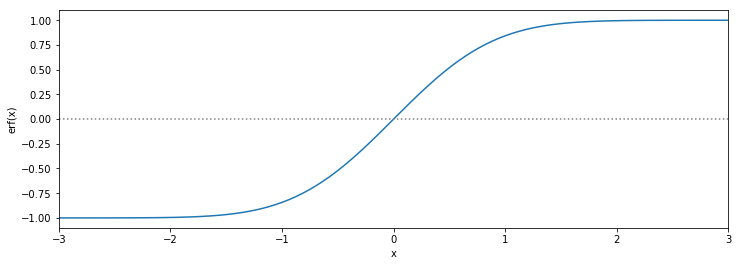

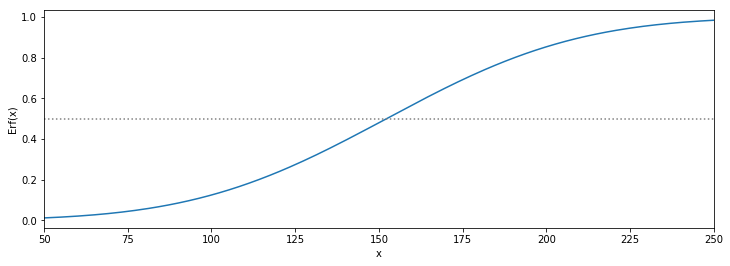

The measurement may be discarded.
Tree height is 160 +/- 10 m


In [47]:
from scipy.special import erf

#Erf function
def Erf(x,mean_u,sig):                                 
    return 0.5*(1 + erf((x-mean_u)/(np.sqrt(2)*sig)))

#Make linspace so it runs from [-3,3] with 100 steps
x = np.linspace(-3,3,100)

#plot for error function
plt.figure(figsize=(12,4))
plt.plot(x,erf(x))
plt.axhline(c='grey',linestyle=':')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.xlim(min(x),max(x))
plt.show()

#Make another linspace for range [0,30] with 100 steps
x2 = np.linspace(50,250,200)

#plot for Erf function
plt.figure(figsize=(12,4))
plt.plot(x2,Erf(x2,Flat_av,Flat_std))
plt.axhline(0.5,c='grey',linestyle=':')
plt.xlabel('x')
plt.ylabel('Erf(x)')
plt.xlim(min(x2),max(x2))
plt.show()

#Find outlier
out = np.min(L)

#Check whether the outlier can be discarded
P = 2*Erf(out,Flat_av,Flat_std)

if P*len(L) < 0.5:
    print('The measurement may be discarded.')
else:
    print('The measurement may not be discarded.')

L_new = np.delete(L,np.where(L == 42.5))

Flat_av_new = np.mean(L_new)
Flat_std_new = np.std(L_new,ddof=1)

print('Tree height is {:.0f} +/- {:.0f} m'.format(round(Flat_av_new,-1),round(Flat_std_new/np.sqrt(len(L)),-1)))

The pros of removing specific parts of the dataset is that your mean and your std don't get influenced heavily by specific outliers. But by removing specific parts it is also possible that you are influencing your mean and std for the worse. Especially in small datasets you do not know if something went wrong with measureing or if the std of the measured value is just very large.

### Exercise 4
# Height vs. weigth
Attached is a csv file which contains the height (first column) and the weight (second column) of a (male) person. 

**a** Convert the data to metric units as it is now in inches and in lbs. 

**b** Make a scatter plot and see if you if you can fit a lineair relation. 

**c** Find the mean and std of both the height and weight. 

**d** Make a histogram for both and overlay a Gaussian to see if the data follows a normal distribution.

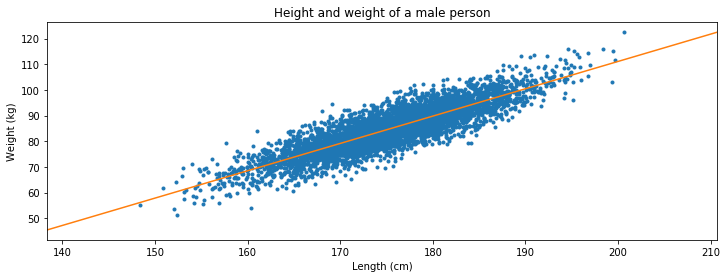

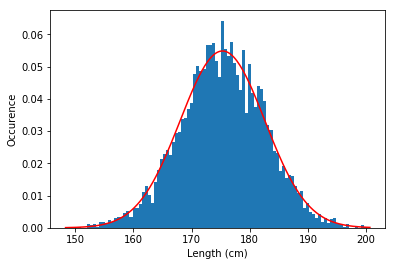

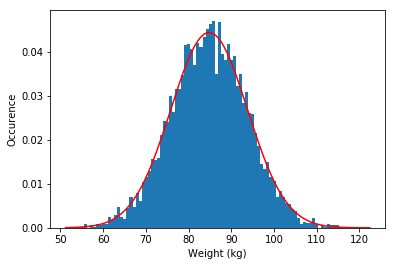

In [58]:
from scipy.optimize import curve_fit
from scipy.stats import norm

#Import data
data = np.genfromtxt('weight-height.csv',delimiter=',',dtype=float,skip_header=1)

#Extract height and weight from dataset
height = data[:,0] #Extract first column
weight = data[:,1] #Extract second column

#Transform to metric
height = height*2.54
weight = weight*0.4536
    
#Calculate mean and std
height_mean = np.mean(height)
height_std = np.std(height,ddof=1)
weight_mean = np.mean(weight)
weight_std = np.std(weight,ddof=1)

#Linear function to fit
def lin(x,a,b):
    return a*x + b

#Find parameters a and b (in val)
val, cov = curve_fit(lin,height,weight)

#Make x-and y coordinates to plot the fit
x = np.linspace(np.min(height)-10,np.max(height)+10)
y = lin(x,val[0],val[1])

#Plot the data
plt.figure(figsize=(12,4))
plt.title('Height and weight of a male person')
plt.plot(height,weight,'.',label='data')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (kg)')
plt.xlim(min(x),max(x))

#Plot the fit
plt.plot(x,y,label='fit')
plt.show()


### Histograms with gaussians ####

N=200
x2 = np.linspace(np.min(height),np.max(height),N)

#Histogram plot #1
plt.figure()
plt.hist(height,bins=100,density = 1) #Note the density=1 , this rescales the histogram

#Make values for the Gaussian plot
dist = norm.pdf(x2,height_mean,height_std)

#Plot the Gaussian
plt.plot(x2,dist,'r')
plt.xlabel('Length (cm)')
plt.ylabel('Occurence')
plt.show()

#Make a x array to use in the Gaussian
x2 = np.linspace(np.min(weight),np.max(weight),N) 

#Histogram plot #2
plt.figure()
plt.hist(weight,bins=100,density=1) #Note the density=1 , this rescales the histogram

#Make the Gaussian 
dist = norm.pdf(x2,weight_mean,weight_std)  

#Plot the Gaussian
plt.plot(x2,dist,'r') #Plot the Guassian
plt.xlabel('Weight (kg)')  #xlabel
plt.ylabel('Occurence')   #ylabel
plt.show()  #Show plot


### Exercise 5

In an experiment 10 measurements were taken of the voltage over and current through a Si-diode. The results are displayed in the following table together with their uncertainties:

| I (μA) | $\alpha_I$ (μA)| V (mV)| $\alpha_V$ (mV)| 
| ---   | ---     | ---   | --- |
|3034 |4      | 670   | 4   |        
|1494 |2      | 636   | 4   |       
|756.1 |0.8     |604    | 4   |    
|384.9 |0.4     | 572   | 4   |      
|199.5 |0.3     | 541   | 4   |    
|100.6 |0.2     | 505   | 4   |     
|39.93 |0.05    | 465   | 3   |     
|20.11 |0.03    | 432   | 3   |     
|10.23 |0.02    | 400   | 3   |     
|5.00  |0.01    | 365   | 3   |  
|2.556  |0.008    | 331   | 3   |    
|1.269  |0.007    | 296   | 2   |    
|0.601  |0.007    |257    | 2   |
|0.295  |0.006    |221    | 2   |
|0.137  |0.006    |181    | 2   |
|0.067  |0.006    |145    | 2   |


The diode is expected to behave according to the following relation: $I = a(e^{bV}-1)$, where $a$ and $b$ are unknown constants . 

**a** Use the curve_fit function to determine whether this is a valid model to describe the dataset.

*Hint: use a logscale on the y-axis*

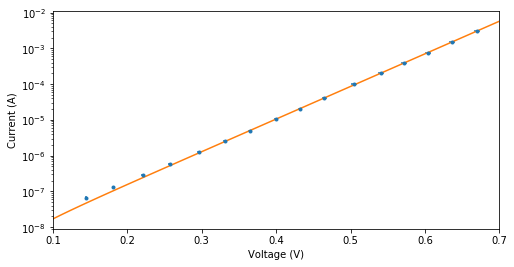

The model is in good agreement with the measurements, it is therefore a valid model.
2.3796115208119935e-09 20.983641479652693


In [8]:
from scipy.optimize import curve_fit

#Data
I = np.array([3034,1494,756.1,384.9,199.5,100.6,39.93,20.11,10.23,5.00,2.556,1.269,0.601,0.295,0.137,0.067])*1e-6
a_I = np.array([4,2,0.8,0.4,0.3,0.2,0.05,0.03,0.02,0.01,0.008,0.007,0.007,0.006,0.006,0.006])*1e-6
V = np.array([670,636,604,572,541,505,465,432,400,365,331,296,257,221,181,145])*1e-3
a_V = np.array([4,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2])*1e-3


#Function to fit
def current(V,a,b):
    return a*(np.exp(b*V)-1)

#Make the fit
popt, pcov = curve_fit(current,V,I)

#Make x-and y coordinates for plotting
x = np.linspace(0.1,0.7)
y = current(x,*popt)

#Make plots
plt.figure(figsize=(8,4))
plt.errorbar(V,I,xerr=a_V,yerr=a_I,linestyle='none',marker= '.',label='data')
plt.plot(x,y,label='fit')
plt.yscale('log')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.xlim(0.1,0.7)
plt.show()
print('The model is in good agreement with the measurements, it is therefore a valid model.')

### Exercise 6

A student measures the position of a simple mass-spring system. Unfortunately, he accidentally moves his measuring device during the experiment. He is not sure if the device was put back in the right position and wants to know if there is a systematic error in his data. The dataset consists of 400 position measurements (in cm) over the course of 5 seconds. The data is expected to follow a sine function with an amplitude of 4.5 and a period of 10$\pi$. 

**a** Import the data_2.dat file.
 
**b** Plot the raw data, calculate and plot the residuals and determine whether there is indeed a systematic error in the data.
 
**c** If so, approximate the magnitude of the systematic error and the time at which the occurs.


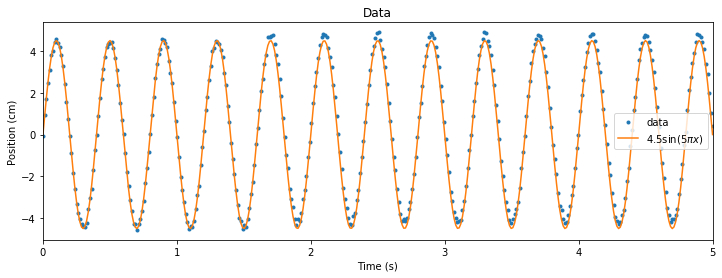

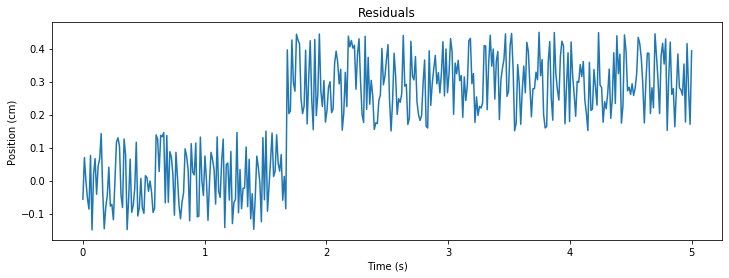

In [21]:
#Import data
data = np.genfromtxt('data_2.dat')

#Make linspace based on text given
t = np.linspace(0,5,400)

#sine function to fit the data
def sine(x):                        
    return 4.5*np.sin(x*5*np.pi)

#Plot of data and sine function
plt.figure(figsize=(12,4))
plt.plot(t,data, '.', label='data')
plt.plot(t,sine(t), label='$4.5\sin(5\pi x$)')
plt.xlim(min(t),max(t))
plt.ylabel('Position (cm)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

#Calculate residuals
R = data - sine(t)  

#plot of Residuals
plt.figure(figsize=(12,4))
plt.title('Residuals')
plt.plot(t,R)
plt.ylabel('Position (cm)')
plt.xlabel('Time (s)')
plt.show()

**Explanation:** 
Shift seems to occur around t = 1.7 s and has a magnitude of 0.3 cm

### Exercise 7
# Functional vs. Calculus Approach
You have both seen the functional and the analytical method in calculating the propagation of an error. 

Apply both methods on the following functions:
$$
Z(x)=\frac{x-1}{x+1}
$$


With $ x = 3.2 \pm 0.2$
$$
Z(x)=e^{x^2}
$$




With $ x = 8.745 \pm 0.005$

In [35]:
#First function
def func1(x):                      
    return (x-1)/(x+1)

#Second function
def func2(x):                      
    return np.exp(x**2)

#Function for the functional method
def functional(x,sig,f):           
    return (f(x+sig) - f(x-sig))/2

#First function 
x_1 = 3.2
sig = 0.2
error_functional = functional(x_1,sig,func1)
error_calculus = sig*((x_1+1)-(x_1-1))/(x_1+1)**2  #Derivative was calculated by hand

print('First function \n\
Value of Z: %.2f \n\
Error with functional approach: %.2f \n\
Error with calculus approach: %.2f \n\
' %(func1(x_1),error_functional,error_calculus))

#Second function
x_2 = 8.745
sig = 0.005
error_functional = functional(x_2,sig,func2)
error_calculus = sig*2*x_2*func2(x_2)  


print('Second function \n\
Value of Z: %.1e \n\
Error with functional approach: %.0e \n\
Error with calculus approach: %.0e \
' %(func2(x_2),error_functional,error_calculus))

First function 
Value of Z: 0.52 
Error with functional approach: 0.02 
Error with calculus approach: 0.02 

Second function 
Value of Z: 1.6e+33 
Error with functional approach: 1e+32 
Error with calculus approach: 1e+32 


### Exercise 8

The gravitational force between two bodies can be described with Newton's law of universal gravitation: $F = \frac{Gm_1m_2}{r^2}$, where $G$ is the gravitational constant, $m_i$ the masses of the bodies and $r$ the distance between the bodies.

Suppose that a meteorite of mass $(4.739\pm0.154)\cdot10^8$kg at a distance of $(2.983\pm0.037)\cdot10^6$m is moving towards the earth. Determine the attracting force between the meteorite. Use both the functional and the calculus approach to calculate the uncertainty in $F$ and compare the results. You can use the following values:

Earth mass: $(5.9722\pm0.0006)\cdot10^{24}$kg

Gravitational constant: $(6.67259\pm0.00030)\cdot10^{-11}$m$^3$ s$^{-2}$ kg$^{-1}$


In [50]:
#function for gravitational force
def FG(G,m1,m2,r):
    return G * m1 * m2 /(r*r)

#values
G = 6.6759e-11
u_G = 0.00030e-11

m1 = 4.739e8
u_m1 = 0.154e8

m2 = 5.9722e24
u_m2 = 0.0006e24

r = 2.983e6
u_r = 0.037e6

#value of gravitatonal force
F_m = FG(G,m1,m2,r)

#Calculus appraoch
r2 = r**2
u_F2 = (m1*m2/r2*u_G)**2 + (G*m2/r2*u_m1)**2 + (G*m1/r2*u_m2)**2 + (-2*G*m1*m2/(r2*r)*u_r)**2
u_F_calc = np.sqrt(u_F2)

#Funcional approach
U_F2 = ((FG(G+u_G,m1,m2,r)-FG(G-u_G,m1,m2,r))/2)**2 + ((FG(G,m1+u_m1,m2,r)-FG(G,m1-u_m1,m2,r))/2)**2 + ((FG(G,m1,m2+u_m2,r)-FG(G,m1,m2-u_m2,r))/2)**2 + ((FG(G,m1,m2,r+u_r)-FG(G,m1,m2,r-u_r))/2)**2
u_F_func = np.sqrt(U_F2)


print("F = %.2f +/- %.2f 10^10 N \n" %(F_m/1e10,u_F_func/1e10))

diff = np.abs(u_F_calc-u_F_func)

print("Uncertainties \n\
Caluculus approach: %f 10^8 N \n\
Functional approach: %f 10^8 N \n\
Difference: %f 10^8 N" %(u_F_calc/1e8,u_F_func/1e8,diff/1e8))

F = 2.12 +/- 0.09 10^10 N 

Uncertainties 
Caluculus approach: 8.680952 10^8 N 
Functional approach: 8.681935 10^8 N 
Difference: 0.000984 10^8 N


### Exercise 9

The behavior of many gases can be well approximated by the ideal gas law: $PV=nRT$, where $P$ is the pressure, $V$ the volume of the gas, $n$ the amount of substance in moles, $T$ the temperature of the gas. $R$ is the ideal gas constant, which is actually just the Boltzmann constant multiplied by the Avogrado constant, with a value of $8.314$ J⋅K$^{-1}$⋅mol$^{-1} $.

A student performs an experiment with a closed container of $3.23\pm0.01$ litres filled with $0.172\pm0.001$ mol Helium gas. The volume remains constant throughout the experiment and no particles can enter or leave the container. The student slowly heats the gas and measures the change in pressure. The results are shown in the following table. 


| Temperature (K) | Pressure (kPa)|
| ---   | ---     |
|293.2 |128.57      |
|304.4 |134.44      |
|313.8 |137.93   |
|327.3 |145.33   |
|335.0 |187.97   |
|348.3 |155.16      |
|359.1 |158.85      |
|371.6 |164.08     |

The uncertainty in $T$ is 0.2 K for all values.

**a** Calculate the uncertainty in P using the calculus approach 

**b** Fit the data to the model. What do you see? Is the data well described by the ideal gas law?


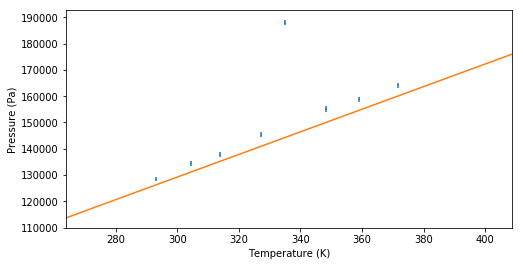

In [12]:
def Press(V,n,R,T):  #ideal gas law
    return n*R*T/V

#values
R = 8.314

n = 0.172
u_n = 0.001

V = 3.32e-3
u_V = 0.01e-3

#Data
T = np.array([293.2,304.4,313.8,327.3,335.0,348.3,359.1,371.6])
u_T = np.ones(len(T))*0.2

P = np.array([128.57,134.44,137.93,145.33,187.97,155.16,158.85,164.08])*1e3
u_P2 = (R*T/V*u_n)**2 + (n*R/V * u_T)**2 + (- n*R*T/(V*V)*u_V)**2
u_P = np.sqrt(u_P2)

#model 
P_calc = Press(V,n,R,T)

#plot
linT = np.linspace(0.9*np.min(T),1.1*np.max(T),100)
plt.figure(figsize=(8,4))
plt.errorbar(T,P,xerr=u_T,yerr=u_P,label='data',linestyle='none') #data
plt.plot(linT,Press(V,n,R,linT),label='Ideal gas law')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pa)')
plt.xlim(np.min(linT),np.max(linT))
#plt.legend()
plt.show()


**c** One data point seems to be an outlier. Use Chauvenet's criterium to determine wether the point can be discarded.

In [48]:
#Calculate mean,std and value
Press_mean = np.mean(P)
Press_std = np.std(P,ddof=1)
Press_val = np.max(P)

#Use Erf which was defined before
Q = Erf(Press_val,Press_mean,Press_std)

#It is a higher outlier so 1-Q
if Q > 0.5:
    Q = (1-Q)

#Use Chauvenets criterion
N =  2 * len(P) *Q

if N < 0.5:
    print('The value can be discarded.')
else:
    print('The value cannot be discarded.')


The value can be discarded.


### Exercise 10
When measuring there is always a very real possibility of a systematic error. One of these systematic errors can be found in a mass-spring system. Normally the period of a mass-spring system is given by: $T = 2\pi \sqrt{\frac{m}{C}}$. Here $m$ is the mass and $C$ is the spring constant. However this formula assumes that you have a massless spring, this is not true unfortunately. This means that the mass of the spring is also vibrating, we should thus change the formula to take this into account. This gives the following equation: $T = 2\pi \sqrt{\frac{m + \Delta m}{C}}$, where $\Delta m$ is the systematic error.

With the measurements that we have we can find both the spring constant and its uncertainties. The array m is an array with the values for the measured m and the array T is an array with all the measured data for the period. You can disregard the invalid use of significant figures.

**a** Plot the data

**b** Find the parameters $\Delta m$ and $C$ with its corresponding uncertainties

**c** Plot the fitted function over the data and look at the residuals

dm = 4.1 +/- 0.2 m
C = 349.9 +/- 0.4 kg m/s^2


C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


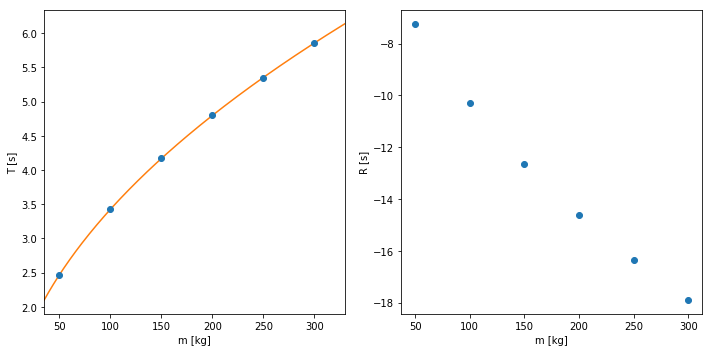

In [70]:
from scipy.optimize import curve_fit

m = np.array([50,100,150,200,250,300])
T = np.array([2.47,3.43,4.17,4.80,5.35,5.86])


#Define Function to fit
def Per(m,dm,C):
    return 2*np.pi*np.sqrt((m+dm)/C)

#Make figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.errorbar(m,T,linestyle='none',marker='o')
ax.set_xlabel('m [kg]')
ax.set_ylabel('T [s]')

#Make Fit
vals, uncmat = curve_fit(Per,m,T)

#Make linspace
linm = np.linspace(0.7*np.min(m),1.1*np.max(m),200)

#Plot the fitted line
ax.plot(linm,Per(linm,*vals))

#Set the x-limit
ax.set_xlim(np.min(linm),np.max(linm))

#Finde the uncertainties
u_dm, u_C = np.sqrt(np.diag(uncmat))


#Print the values gotten and its uncertainties
print('dm = {:.1f} +/- {:.1f} m'.format(vals[0],u_dm))
print('C = {:.1f} +/- {:.1f} kg m/s^2'.format(vals[1],u_C))

#Make a residual analysis
r = T - Per(m,*popt)

#Plot the risiduals
ax2 = fig.add_subplot(122)
ax2.plot(m,r,linestyle='none',marker='o')
ax2.set_xlabel('m [kg]')
ax2.set_ylabel('R [s]')

#Make it a bit pretier
plt.tight_layout()





# Error in the Error
There is always an error in the error. This number tells you whether you use 1 or 2 significant values for your uncertainty. 
$$
\text{errror in the error} = \frac{1}{\sqrt{2N - 2}}
$$

![](figure_err.JPG)

### Exercise 11
See if you can reproduce the plot shown above, use a logarithmic scale on the x-axis and make the horizontal and vertical dashed lines (you can only do one point to show that you know how to do it).



*Hint: use `plt.hlines` and `plt.vlines` to make it a bit easier (look at the documentation to see how the functions work).* 

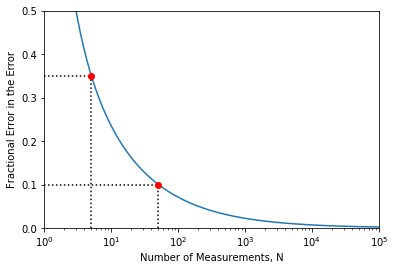

In [38]:
def err_err(N):
    return 1/(np.sqrt(2*N - 2))

#Make logspace and fill in y values
x = np.logspace(0.4,5,100)
y = err_err(x)

#Make plot
plt.figure(figsize=(6,4))
plt.plot(x,y)
plt.xscale('log')
plt.ylabel('Fractional Error in the Error')
plt.xlabel('Number of Measurements, N')
plt.xlim(1,1e5)
plt.ylim(0,0.5)

#For point (5,0.35)
plt.plot(5,0.35,'o',c='red')
plt.hlines(0.35,1,5,linestyle=':')
plt.vlines(5,0,0.35,linestyle=':')

#For point (50,0.1)
plt.plot(50,0.1,'o',c='red')
plt.hlines(0.1,1,50,linestyle=':')
plt.vlines(50,0,0.1,linestyle=':')

plt.show()